Mounting the google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')                                  

Mounted at /content/drive


Importing Required Modules

In [3]:
import tensorflow as tf    
import pandas as pd
from __future__ import division, print_function, absolute_import
from tqdm import tqdm
from keras.preprocessing import image
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Activation
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers import Cropping2D
from keras.layers.core import Dropout
from keras.layers.normalization import BatchNormalization
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils import data
from torch.utils.data import DataLoader
import torchvision.transforms as transforms


Importing the train data

In [4]:
data = io.loadmat('/content/drive/My Drive/Colab Notebooks/data')
X = []
Y = []
del data['__header__']
del data['__version__']
del data['__globals__']

for k in tqdm(data.keys()):
    img = np.asarray(data[k])
    X.append(img)
    j = k.find('angle')+6
    angle = float(k[j:j+4])
    j = k.find('throttle')+9
    throttle = float(k[j:j+4])
    Y.append([angle,throttle])
X = np.array(X)
Y = np.array(Y)
print(X.shape)
assert Y.shape[1] == 2
print(Y.shape)

100%|██████████| 2807/2807 [00:00<00:00, 312126.49it/s]


(2807, 240, 320, 3)
(2807, 2)


Split data into train data and test data

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=13, test_size=100, shuffle = True)
print(X_train.shape,X_test.shape)

(2707, 240, 320, 3) (100, 240, 320, 3)


Defining the Model

Convolution Layers

In [6]:
model = keras.Sequential()
model.add(keras.Input(shape = (240,320,3)))
model.add(layers.Conv2D(24, 5, strides=2, activation="elu", use_bias=False))
model.add(layers.Conv2D(36,5, strides=2,activation="elu", use_bias=False))
model.add(layers.Conv2D(48,5, strides=2,activation="elu",use_bias=False))
model.add(layers.Conv2D(64,5, strides=2,activation="elu",use_bias= False))
model.add(layers.Conv2D(64,5, strides=2,activation="elu", use_bias=False))
model.add(layers.Dropout(.4))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 158, 24)      1800      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 77, 36)        21600     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 37, 48)        43200     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 17, 64)        76800     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 7, 64)          102400    
_________________________________________________________________
dropout (Dropout)            (None, 4, 7, 64)          0         
Total params: 245,800
Trainable params: 245,800
Non-trainable params: 0
__________________________________________________

Linear Layers

In [7]:
model.add(Flatten())
model.add(layers.Dense(100,activation='elu',use_bias=False, input_shape = (64*1*18,)))
model.add(layers.Dense(50,activation='elu',use_bias=False, input_shape = (100,)))
model.add(layers.Dense(10,activation='elu',use_bias=False, input_shape = (50,)))
model.add(layers.Dense(2,activation='elu',use_bias=False, input_shape = (10,)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 158, 24)      1800      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 77, 36)        21600     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 37, 48)        43200     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 17, 64)        76800     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 7, 64)          102400    
_________________________________________________________________
dropout (Dropout)            (None, 4, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [10]:
tf.debugging.set_log_device_placement(True)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.CategoricalCrossentropy()])  
num_epochs = 50

In [11]:
hist=model.fit(X_train, Y_train, epochs=num_epochs, validation_data=(X_test, Y_test),batch_size=32, shuffle=True)

Epoch 1/50
85/85 [==============================] - 2s 28ms/step - loss: 0.1996 - categorical_crossentropy: 0.0786 - val_loss: 0.1717 - val_categorical_crossentropy: 0.3434
Epoch 2/50
85/85 [==============================] - 2s 27ms/step - loss: 0.1553 - categorical_crossentropy: -0.0469 - val_loss: 0.1296 - val_categorical_crossentropy: -0.5018
Epoch 3/50
85/85 [==============================] - 2s 27ms/step - loss: 0.1261 - categorical_crossentropy: -0.1407 - val_loss: 0.1102 - val_categorical_crossentropy: -0.5248
Epoch 4/50
85/85 [==============================] - 2s 26ms/step - loss: 0.1038 - categorical_crossentropy: -0.4000 - val_loss: 0.0938 - val_categorical_crossentropy: -0.5444
Epoch 5/50
85/85 [==============================] - 2s 27ms/step - loss: 0.0902 - categorical_crossentropy: -0.4644 - val_loss: 0.0818 - val_categorical_crossentropy: 0.0472
Epoch 6/50
85/85 [==============================] - 2s 27ms/step - loss: 0.0776 - categorical_crossentropy: -0.3406 - val_loss: 

{'loss': [0.19957053661346436, 0.15531064569950104, 0.12610071897506714, 0.1038222685456276, 0.09023178368806839, 0.07763566076755524, 0.06945248693227768, 0.05841957405209541, 0.052488695830106735, 0.04734417423605919, 0.04260252043604851, 0.03488766402006149, 0.03417177498340607, 0.03029594011604786, 0.02698821760714054, 0.024570198729634285, 0.022327864542603493, 0.020571153610944748, 0.01767643354833126, 0.017639899626374245, 0.016428859904408455, 0.014509590342640877, 0.013435383327305317, 0.012044702656567097, 0.011138132773339748, 0.01087875198572874, 0.00885941181331873, 0.008959388360381126, 0.008255310356616974, 0.007708628196269274, 0.007145066745579243, 0.007450591307133436, 0.00655956007540226, 0.0060869320295751095, 0.0057060071267187595, 0.005324108060449362, 0.004989570006728172, 0.004763749893754721, 0.004747308325022459, 0.003981091547757387, 0.003952422644942999, 0.0035806840751320124, 0.0034435063134878874, 0.0039596050046384335, 0.0031938457395881414, 0.00312638957

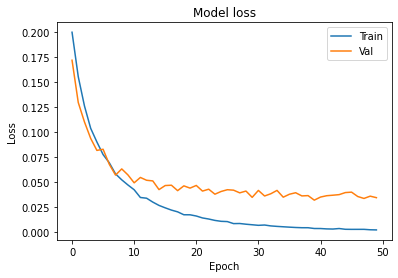

In [14]:
print(hist.history)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.pause(5.)

In [15]:
model.save("model1.h5")   